In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim

In [20]:
def model(x: torch.Tensor, w2: torch.Tensor, w1: torch.Tensor, w: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
    return w2 * x**3 + w1 * x ** 2 + w * x + b


def loss(y: torch.Tensor, yp: torch.Tensor) -> torch.Tensor:
    return ((y - yp)**2).mean()

In [3]:
temp_unkown = torch.tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000, 48.400, 60.4000, 68.4000])
temp_celcius = torch.tensor([0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000, 6.0000, 13.0000, 21.0000])

In [4]:
params = torch.tensor([1, 1, 0], dtype=torch.float32, requires_grad=True)
epochs = 1000
alpha = 1e-2
temp_unkown = temp_unkown / 10

for i in range(epochs):
    temp_predicted = model(temp_unkown, *params)
    lossResult = loss(temp_celcius, temp_predicted)

    lossResult.backward()

    with torch.no_grad():
        if params.grad is not None: params -= params.grad * alpha

    if params.grad is not None:
        params.grad.zero_()

    if i % 100 == 0:
        print(lossResult)


params

tensor(675.7943, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)
tensor(nan, grad_fn=<MeanBackward0>)


tensor([nan, nan, nan], requires_grad=True)

In [5]:
epochs = 2000
params = torch.tensor([1., 1.,0.], requires_grad=True)
lr = 1e-1

optimizer = optim.Adam([params], lr)

for i in range(epochs):
    temp_predicted = model(temp_unkown, *params)
    train_loss = loss(temp_celcius, temp_predicted)
    train_loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if i % 500 == 0:
        print(train_loss)

params

tensor(11709471., grad_fn=<MeanBackward0>)
tensor(4.8415, grad_fn=<MeanBackward0>)
tensor(3.7844, grad_fn=<MeanBackward0>)
tensor(3.4664, grad_fn=<MeanBackward0>)


tensor([ 0.0060, -0.1081, -1.4510], requires_grad=True)

In [7]:
threshold = int(0.8 * temp_unkown.shape[0])

rand_indices= torch.randperm(temp_unkown.shape[0])

train_unkown = temp_unkown[rand_indices[:threshold]]
train_celcius = temp_celcius[rand_indices[:threshold]]

test_unkown = temp_unkown[rand_indices[threshold:]]
test_celcius = temp_celcius[rand_indices[threshold:]]

In [30]:
epochs = 5000
params = torch.tensor([0., 0., 0., 0.], requires_grad=True)
lr = 1e-4

optimizer = optim.Adam([params], lr)


for epoch in range(epochs):
    temp_predict = model(train_unkown, *params)
    train_loss = loss(train_celcius, temp_predict)

    train_loss.backward()
    optimizer.step()

    with torch.no_grad():
        test_predict = model(test_unkown, *params)
        test_loss = loss(test_celcius, test_predict)

    optimizer.zero_grad()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" Validation loss {test_loss.item():.4f}")

params

Epoch 0, Training loss 240.5000, Validation loss 31.5759
Epoch 500, Training loss 2.8680, Validation loss 15.5116
Epoch 1000, Training loss 2.8493, Validation loss 15.7602
Epoch 1500, Training loss 2.8316, Validation loss 15.5868
Epoch 2000, Training loss 3.2424, Validation loss 17.0271
Epoch 2500, Training loss 2.7958, Validation loss 15.2356
Epoch 3000, Training loss 3.5935, Validation loss 15.4254
Epoch 3500, Training loss 2.7612, Validation loss 14.8908
Epoch 4000, Training loss 2.7449, Validation loss 14.7076
Epoch 4500, Training loss 2.7281, Validation loss 14.5572


tensor([ 1.3563e-05,  3.4877e-03, -2.0651e-02, -8.2586e-02],
       requires_grad=True)

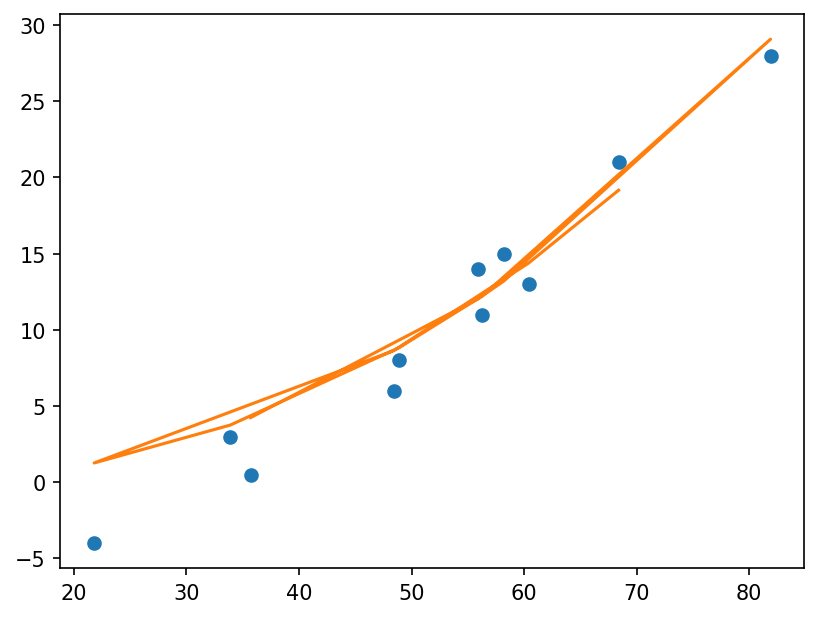

In [31]:
fig = plt.figure(dpi=150)

yp = model(temp_unkown, *params)
plt.plot(temp_unkown, temp_celcius, 'o')
plt.plot(temp_unkown, yp.detach(), '-')